In [1]:
import numpy as np
import matplotlib.pyplot as plt

import importlib
import fixed_exploration as fe
importlib.reload(fe);

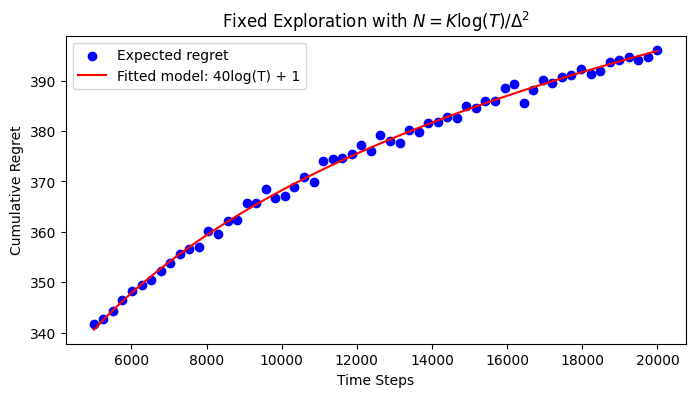

In [2]:
# This code blocks runs for ~ 1min.

importlib.reload(fe);

K = 5
T_values = np.linspace(5000, 20000, num=60, dtype=int)
mu = np.linspace(0, 1, K)

# Compute average regrets for each T, with N = K * log(T) / Delta^2.
avg_regrets = []
for T in T_values:
    reg = fe.average_regret(K, T, mu, N=None, method='sublinear', num_runs=150)
    avg_regrets.append(reg)
avg_regrets = np.array(avg_regrets)

# Interpolation
# We expect regret ~ O(log(T)), so we fit a line: avg_regret = a * log(T) + b
logT = np.log(T_values)
coeffs = np.polyfit(logT, avg_regrets, 1)
a, b = coeffs
fitted_regrets = a * logT + b

plt.figure(figsize=(8, 4))
plt.scatter(T_values, avg_regrets, color='blue', label="Expected regret")
plt.plot(T_values, fitted_regrets, color='red', label=f"Fitted model: {a:.0f}log(T) + {b:.0f}")
plt.xlabel("Time Steps")
plt.ylabel("Cumulative Regret")
plt.title(r"Fixed Exploration with $N = K \log(T) / \Delta^2$")
plt.legend()
plt.show()